In [1]:
from sklearn.metrics import roc_curve, auc
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt


In [2]:
# Load dataset
data = load_iris()
X = data.data
y = data.target


In [3]:
# Convert to binary classification for ROC
y = (y == 0).astype(int)  # Classify as 0 or not 0


In [4]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [5]:
# Initialize and train model
model = RandomForestClassifier()
model.fit(X_train, y_train)


RandomForestClassifier()

In [6]:
# Predict probabilities
y_proba = model.predict_proba(X_test)[:, 1]


In [7]:
# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)


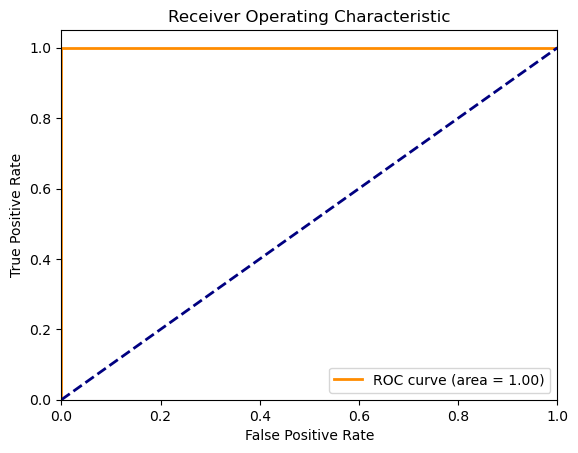

In [8]:
# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()
